In [515]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np
import re

In [450]:
def prepare(data):
    data['import.start'] = pd.to_datetime(data['import.start'])
    data['import.stop'] = pd.to_datetime(data['import.stop'])
    data['created'] = pd.to_datetime(data['created'])
    data['started'] = pd.to_datetime(data['started'])
    data['finished'] = pd.to_datetime(data['finished'])
    
    data['starttime'] = (data['started'] - data['created']).dt.total_seconds() 
    data['dockertime'] = (data['finished'] - data['started']).dt.total_seconds() 
    data['importtime'] = (data['import.stop'] - data['import.start']).dt.total_seconds() 
    
    started_temp = pd.DataFrame()
    docker_temp = pd.DataFrame()
    import_temp = pd.DataFrame()
    total_temp = pd.DataFrame()
    
    for i in range(8,38,6):
        started_temp.insert(range(8,38,6).index(i), "", (pd.to_datetime(data.iloc[:, i+1]) - pd.to_datetime(data.iloc[:, i])).dt.total_seconds() , True)
        docker_temp.insert(range(8,38,6).index(i), "", (pd.to_datetime(data.iloc[:, i+2]) - pd.to_datetime(data.iloc[:, i+1])).dt.total_seconds() , True)
        import_temp.insert(range(8,38,6).index(i), "", (pd.to_datetime(data.iloc[:, i+4]) - pd.to_datetime(data.iloc[:, i+3])).dt.total_seconds() , True)
        total_temp.insert(range(8,38,6).index(i), "", (pd.to_datetime(data.iloc[:, i+4]) - pd.to_datetime(data.iloc[:, i])).dt.total_seconds() +1 , True)
    
    started_temp.columns = ['starttime{}'.format(i) for i in range(1, 6)]
    docker_temp.columns = ['dockertime{}'.format(i) for i in range(1, 6)]
    import_temp.columns = ['importtime{}'.format(i) for i in range(1, 6)]
    total_temp.columns = ['warmtime{}'.format(i) for i in range(1, 6)]
    
    data = pd.concat([data, started_temp, docker_temp, import_temp, total_temp], axis=1)
    
    return data

In [451]:
def extract_imports(imp):
    imp = imp.split("'")
    l = ""
    
    for i in imp:
        if i == "(" or i == ")" or i == ",)" or i == "," or i == "()" or i == ", ":
            continue
        else:
            if l == "":
                l = i
            else:
                l = l + ";" + i
    return l

In [452]:
col = ['imports', 'buldingtime', 'installtime', 'starttime', 'dockertime', 'importtime', 
       'starttime1', 'starttime2', 'starttime3', 'starttime4', 'starttime5', 
       'dockertime1', 'dockertime2', 'dockertime3', 'dockertime4', 'dockertime5', 
       'importtime1', 'importtime2', 'importtime3', 'importtime4', 'importtime5', 
       'warmtime1', 'warmtime2', 'warmtime3', 'warmtime4', 'warmtime5']

In [432]:
data = pd.read_csv("data/every_package/run10.csv")
data = prepare(data)
imp = data[col[0]]
data = data[col[1:]]
for i in range(9, 0, -1):
    tmp = pd.read_csv("data/every_package/run0" + str(i) + ".csv")
    tmp = prepare(tmp)
    tmp = tmp[col[1:]]
    data = (data + tmp)
data = data / 10
data.insert(0, col[0], imp)

In [24]:
data.sort_values(by=['imports'], ascending=True)

,imports,buldingtime,installtime,starttime,dockertime,importtime,starttime1,starttime2,starttime3,starttime4,...,dockertime1,dockertime2,dockertime3,dockertime4,dockertime5,importtime1,importtime2,importtime3,importtime4,importtime5
52,PIL,10.08,6.36,2.108298,1.193852,0.013953,0.667763,0.737138,0.742705,0.667914,...,1.021978,1.021711,1.021370,1.020851,1.021668,0.001137,0.000956,0.000969,0.000951,0.001033
0,argparse,8.41,5.31,2.026819,1.210094,0.044723,0.643705,0.622289,0.749516,0.647798,...,1.033787,1.033656,1.033979,1.033972,1.033666,0.010771,0.011305,0.010256,0.010476,0.009689
1,clean,10.11,6.21,2.264412,1.225619,0.008079,0.806776,0.811559,0.876272,0.895461,...,1.020749,1.020595,1.020425,1.020686,1.020643,0.000363,0.000313,0.000283,0.000356,0.000386
2,collections,3.10,-1.00,2.838753,1.332040,0.053543,0.755990,0.707457,0.751481,0.635921,...,1.055140,1.055973,1.055858,1.055842,1.055403,0.017491,0.017785,0.017393,0.017150,0.017925
3,colmena,18.33,14.83,2.292351,1.201289,0.008861,0.774815,0.751169,0.748512,0.698446,...,1.020600,1.020932,1.020517,1.020675,1.020727,0.000348,0.000371,0.000343,0.000450,0.000418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,urllib3,8.46,5.57,2.105103,1.662203,0.455932,0.718015,0.659613,0.754252,0.807083,...,1.113635,1.112219,1.112764,1.113489,1.113261,0.079703,0.079253,0.079546,0.079558,0.079631
88,uuid,9.98,7.12,2.033960,1.218466,0.052394,0.635997,0.656979,0.617127,0.668849,...,1.034703,1.034570,1.034552,1.034244,1.034420,0.011224,0.011740,0.011830,0.012209,0.011898
89,warnings,2.65,-1.00,2.180663,1.233780,0.000008,0.768780,0.746880,0.726569,0.775309,...,1.036572,1.035644,1.036465,1.037282,1.035259,0.000010,0.000012,0.000008,0.000008,0.000007
90,webbrowser,2.68,-1.00,2.186071,1.513124,0.239609,0.743873,0.669989,0.748356,0.741852,...,1.160715,1.167929,1.168152,1.164633,1.162913,0.119145,0.124510,0.119990,0.123114,0.121590


In [487]:
vanilla_approach = pd.read_csv(f"data/vanilla_approach/run10.csv")
all_top_10 = pd.read_csv(f"data/all_top_10/run10.csv")
cluster_top_10 = pd.read_csv(f"data/cluster_top_10/run10.csv")
ont_the_fly = pd.read_csv(f"data/onthefly/run1.csv")

In [488]:
for run in range(9, 0, -1):
    vanilla_approach = pd.concat([vanilla_approach, pd.read_csv(f"data/vanilla_approach/run{run}.csv")])
    all_top_10 = pd.concat([all_top_10, pd.read_csv(f"data/all_top_10/run{run}.csv")])
    cluster_top_10 = pd.concat([cluster_top_10, pd.read_csv(f"data/cluster_top_10/run{run}.csv")])

In [489]:
vanilla_approach = prepare(vanilla_approach)
all_top_10 = prepare(all_top_10)
cluster_top_10 = prepare(cluster_top_10)
ont_the_fly = prepare(ont_the_fly)

In [458]:
vanilla_approach.loc[vanilla_approach['installtime'] == -1, 'installtime'] = 0
all_top_10.loc[all_top_10['installtime'] == -1, 'installtime'] = 0
cluster_top_10.loc[cluster_top_10['installtime'] == -1, 'installtime'] = 0
ont_the_fly.loc[ont_the_fly['installtime'] == -1, 'installtime'] = 0

In [459]:
func_mapping = pd.read_csv('experiments/function_mapping.csv')
func_mapping = func_mapping.drop(2)
func_mapping['func4.imports'] = func_mapping[func_mapping['func4.imports'].str.len() >= 0]['func4.imports'].map(lambda x: extract_imports(x))
func_mapping = func_mapping[func_mapping['func4.imports'] != ""]
func_mapping.rename(columns={'func4.imports': 'imports'}, inplace=True)
func_mapping.drop(columns=['Unnamed: 0'], inplace=True)

In [460]:
func_mapping.head()

,Unnamed: 0.1,func4.name,imports,Cluster
0,0,0-04-_check_slurm_job_statuses.py,subprocess,Job
3,3,873-04-call_mtrack.py,mtrack;sys,Data:_mtrack
4,4,43-04-make_corr_plots.py,json;os;xpcs_webplot,Sci:_Instruments
6,6,3-04-submit_slurm_job.py,os;subprocess,Job
7,7,397-01-rejection_sample.py,random,Trivial


In [461]:
counts = func_mapping.imports.value_counts()
#counts = pd.DataFrame(counts)
#counts.reset_index(inplace=True)
#counts = counts._append({'imports': "argparse;copy;datetime;funcx;itertools;json;matplotlib;numpy;os;pathlib;shutil;sys;threading;typing", 'count': 1}, ignore_index=True)

In [492]:
vanilla_approach_func = pd.merge(vanilla_approach, counts, on="imports", how="left")
all_top_10_func = pd.merge(all_top_10, counts, on="imports", how="left")
cluster_top_10_func = pd.merge(cluster_top_10, counts, on="imports", how="left")
on_the_fly_func = pd.merge(ont_the_fly, counts, on="imports", how="left")

In [464]:
vanilla_approach_func['count'] = vanilla_approach_func['count'].fillna(1)
all_top_10_func['count'] = all_top_10_func['count'].fillna(1)
cluster_top_10_func['count'] = cluster_top_10_func['count'].fillna(1)
on_the_fly_func['count'] = on_the_fly_func['count'].fillna(1)

In [470]:
print(pd.DataFrame({'values' : vanilla_approach_func.buldingtime.repeat(vanilla_approach_func['count'])}).describe())
print(pd.DataFrame({'values' : all_top_10_func.buldingtime.repeat(vanilla_approach_func['count'])}).describe())
print(pd.DataFrame({'values' : cluster_top_10_func.buldingtime.repeat(vanilla_approach_func['count'])}).describe())
print(pd.DataFrame({'values' : on_the_fly_func.buldingtime.repeat(vanilla_approach_func['count'].iloc[0:207])}).describe())

             values
count  12190.000000
mean      46.424865
std       97.940480
min        1.100000
25%        2.200000
50%        8.700000
75%       23.200000
max      655.900000
             values
count  12190.000000
mean      12.268441
std       33.592113
min        1.200000
25%        1.800000
50%        7.000000
75%       10.400000
max      526.000000
             values
count  12190.000000
mean       8.706276
std       19.165229
min        1.000000
25%        2.200000
50%        7.300000
75%       10.500000
max      400.000000
            values
count  1219.000000
mean      4.059147
std      16.228337
min       1.400000
25%       1.800000
50%       2.300000
75%       3.400000
max     257.700000


In [471]:
print(vanilla_approach['buldingtime'].describe())
print(all_top_10['buldingtime'].describe())
print(cluster_top_10['buldingtime'].describe())
print(on_the_fly_func['buldingtime'].describe())

count    2070.000000
mean       43.872947
std        96.535268
min         1.100000
25%         3.600000
50%        11.700000
75%        23.200000
max       655.900000
Name: buldingtime, dtype: float64
count    2070.000000
mean       14.138261
std        41.386941
min         1.200000
25%         3.000000
50%         7.700000
75%        11.375000
max       526.000000
Name: buldingtime, dtype: float64
count    2070.000000
mean       10.193527
std        25.575314
min         1.000000
25%         3.800000
50%         7.900000
75%        10.600000
max       400.000000
Name: buldingtime, dtype: float64
count    207.000000
mean       5.828019
std       25.485735
min        1.400000
25%        1.900000
50%        2.300000
75%        3.350000
max      257.700000
Name: buldingtime, dtype: float64


In [472]:
save_all_top_10 = (vanilla_approach_func['buldingtime'] - all_top_10_func['buldingtime'])/vanilla_approach_func['buldingtime']
save_cluster_top_10 = (vanilla_approach_func['buldingtime'] - cluster_top_10_func['buldingtime'])/vanilla_approach_func['buldingtime']
save_on_the_fly = (vanilla_approach_func['buldingtime'] - on_the_fly_func['buldingtime'])/vanilla_approach_func['buldingtime']

print(save_all_top_10[save_all_top_10 > 0].describe())
print(save_cluster_top_10[save_cluster_top_10 > 0].describe())
print(save_on_the_fly[save_on_the_fly > 0].describe())

count    1662.000000
mean        0.428812
std         0.267260
min         0.001334
25%         0.210526
50%         0.401930
75%         0.602565
max         0.981781
Name: buldingtime, dtype: float64
count    1497.000000
mean        0.485557
std         0.279032
min         0.008130
25%         0.248227
50%         0.481203
75%         0.691860
max         0.980236
Name: buldingtime, dtype: float64
count    175.000000
mean       0.715888
std        0.260671
min        0.015344
25%        0.601291
50%        0.800000
75%        0.906872
max        0.994608
Name: buldingtime, dtype: float64


In [473]:
print(pd.DataFrame({'values' : vanilla_approach_func.installtime.repeat(vanilla_approach_func['count'])}).describe())
print(pd.DataFrame({'values' : all_top_10_func.installtime.repeat(vanilla_approach_func['count'])}).describe())
print(pd.DataFrame({'values' : cluster_top_10_func.installtime.repeat(vanilla_approach_func['count'])}).describe())
print(pd.DataFrame({'values' : on_the_fly_func.installtime.repeat(vanilla_approach_func['count'].iloc[0:207])}).describe())

             values
count  12190.000000
mean      29.847719
std       59.211638
min        0.000000
25%        0.000000
50%        6.100000
75%       18.400000
max      243.300000
             values
count  12190.000000
mean       8.505431
std       23.362617
min        0.000000
25%        0.000000
50%        4.800000
75%        7.400000
max      234.400000
             values
count  12190.000000
mean       5.174143
std       11.609572
min        0.000000
25%        0.000000
50%        4.700000
75%        7.000000
max      217.600000
            values
count  1219.000000
mean      5.583346
std       8.558807
min       0.000000
25%       0.000000
50%       3.384532
75%       6.946174
max      59.241283


In [474]:
print(pd.DataFrame({'values' : vanilla_approach_func.starttime.repeat(vanilla_approach_func['count'])}).describe())
print(pd.DataFrame({'values' : all_top_10_func.starttime.repeat(vanilla_approach_func['count'])}).describe())
print(pd.DataFrame({'values' : cluster_top_10_func.starttime.repeat(vanilla_approach_func['count'])}).describe())
print(pd.DataFrame({'values' : on_the_fly_func.starttime.repeat(vanilla_approach_func['count'].iloc[0:207])}).describe())

             values
count  12190.000000
mean       2.347075
std        0.650185
min        1.135387
25%        1.899092
50%        2.098769
75%        2.664049
max        7.351260
             values
count  12190.000000
mean       2.416179
std        0.632891
min        1.206953
25%        2.002660
50%        2.135876
75%        2.727310
max        7.388799
             values
count  12190.000000
mean       2.185091
std        0.619579
min        1.600626
25%        1.822444
50%        1.928504
75%        2.219674
max        6.446158
            values
count  1219.000000
mean      2.712832
std       1.141040
min       1.602630
25%       2.048774
50%       2.425682
75%       2.920601
max      10.776927


In [475]:
print(vanilla_approach['starttime'].describe())
print(all_top_10['starttime'].describe())
print(cluster_top_10['starttime'].describe())
print(ont_the_fly['starttime'].describe())

count    2070.000000
mean        2.377417
std         0.693898
min         1.135387
25%         1.911363
50%         2.081936
75%         2.707737
max         7.351260
Name: starttime, dtype: float64
count    2070.000000
mean        2.422666
std         0.654609
min         1.206953
25%         2.007425
50%         2.144118
75%         2.697853
max         7.388799
Name: starttime, dtype: float64
count    2070.000000
mean        2.212326
std         0.647975
min         1.600626
25%         1.826340
50%         1.944655
75%         2.316585
max         6.446158
Name: starttime, dtype: float64
count    207.000000
mean       2.785818
std        1.197868
min        1.602630
25%        1.951701
50%        2.482394
75%        3.202495
max       10.776927
Name: starttime, dtype: float64


In [476]:
selected_columns = ['starttime1', 'starttime2', 'starttime3', 'starttime4', 'starttime5']
tmp2 = np.tile(np.array(vanilla_approach_func['count'], dtype=np.int64), 5)
tmp = pd.DataFrame({"values": vanilla_approach_func[selected_columns].values.flatten()})
print(pd.DataFrame({'values' : tmp['values'].repeat(tmp2)}).describe())
tmp = pd.DataFrame({"values": all_top_10_func[selected_columns].values.flatten()})
print(pd.DataFrame({'values' : tmp['values'].repeat(tmp2)}).describe())
tmp = pd.DataFrame({"values": cluster_top_10_func[selected_columns].values.flatten()})
print(pd.DataFrame({'values' : tmp['values'].repeat(tmp2)}).describe())
tmp = pd.DataFrame({"values": on_the_fly_func[selected_columns].values.flatten()})
print(pd.DataFrame({'values' : tmp['values'].repeat(np.tile(np.array(vanilla_approach_func['count'].iloc[0:207], dtype=np.int64), 5))}).describe())

             values
count  60950.000000
mean       0.744091
std        0.311783
min        0.464759
25%        0.575957
50%        0.622189
75%        0.781303
max        4.786615
             values
count  60950.000000
mean       0.751804
std        0.360486
min        0.456613
25%        0.571799
50%        0.615075
75%        0.791910
max        5.962208
             values
count  60950.000000
mean       0.750894
std        0.342150
min        0.455889
25%        0.567250
50%        0.605815
75%        0.771895
max        4.682547
            values
count  6095.000000
mean      1.043103
std       0.606937
min       0.519841
25%       0.664351
50%       0.815230
75%       1.107930
max       4.331439


In [119]:
selected_columns = ['starttime1', 'starttime2', 'starttime3', 'starttime4', 'starttime5']
print(pd.DataFrame(vanilla_approach[selected_columns].values.flatten()).describe())
print(pd.DataFrame(all_top_10[selected_columns].values.flatten()).describe())
print(pd.DataFrame(cluster_top_10[selected_columns].values.flatten()).describe())

                  0
count  10350.000000
mean       0.747031
std        0.317317
min        0.464759
25%        0.575343
50%        0.620596
75%        0.785801
max        4.786615
                  0
count  10350.000000
mean       0.742667
std        0.327570
min        0.456613
25%        0.571401
50%        0.613572
75%        0.781997
max        5.962208
                  0
count  10350.000000
mean       0.747713
std        0.341122
min        0.455889
25%        0.565044
50%        0.606628
75%        0.773078
max        4.682547


In [363]:
slow_start_all_top_10 = (pd.DataFrame(all_top_10[selected_columns].values.flatten()) - pd.DataFrame(vanilla_approach[selected_columns].values.flatten())) / pd.DataFrame(vanilla_approach[selected_columns].values.flatten())
slow_start_cluster_top_10 = (pd.DataFrame(cluster_top_10[selected_columns].values.flatten()) - pd.DataFrame(vanilla_approach[selected_columns].values.flatten())) / pd.DataFrame(vanilla_approach[selected_columns].values.flatten())

print(slow_start_all_top_10.describe())
print(slow_start_cluster_top_10.describe())

         values
count  8.000000
mean   0.048696
std    0.097491
min   -0.017528
25%   -0.008272
50%    0.005183
75%    0.049235
max    0.245600
         values
count  8.000000
mean   0.001530
std    0.040451
min   -0.026317
25%   -0.019750
50%   -0.013579
75%    0.002286
max    0.097397


In [397]:
selected_columns = ['importtime1', 'importtime2', 'importtime3', 'importtime4', 'importtime5']
tmp2 = np.tile(np.array(vanilla_approach_func['count'], dtype=np.int64), 5)
tmp = pd.DataFrame({"values": vanilla_approach_func[selected_columns].values.flatten()})
print(pd.DataFrame({'values' : tmp['values'].repeat(tmp2)}).describe())
tmp = pd.DataFrame({"values": all_top_10_func[selected_columns].values.flatten()})
print(pd.DataFrame({'values' : tmp['values'].repeat(tmp2)}).describe())
tmp = pd.DataFrame({"values": cluster_top_10_func[selected_columns].values.flatten()})
print(pd.DataFrame({'values' : tmp['values'].repeat(tmp2)}).describe())

             values
count  60950.000000
mean       0.363795
std        0.586131
min        0.000006
25%        0.022799
50%        0.122034
75%        0.473193
max        2.782723
             values
count  60950.000000
mean       0.331484
std        0.593865
min        0.000006
25%        0.011844
50%        0.047828
75%        0.423667
max        2.843395
             values
count  60950.000000
mean       0.336161
std        0.597642
min        0.000005
25%        0.012308
50%        0.051632
75%        0.425567
max        2.823189


In [398]:
selected_columns = ['importtime1', 'importtime2', 'importtime3', 'importtime4', 'importtime5']
print(pd.DataFrame(vanilla_approach[selected_columns].values.flatten()).describe())
print(pd.DataFrame(all_top_10[selected_columns].values.flatten()).describe())
print(pd.DataFrame(cluster_top_10[selected_columns].values.flatten()).describe())

                  0
count  10350.000000
mean       0.370839
std        0.607964
min        0.000006
25%        0.026599
50%        0.114231
75%        0.441066
max        2.782723
                  0
count  10350.000000
mean       0.339871
std        0.618188
min        0.000006
25%        0.011698
50%        0.037195
75%        0.363135
max        2.843395
                  0
count  10350.000000
mean       0.344558
std        0.621159
min        0.000005
25%        0.012407
50%        0.047944
75%        0.376575
max        2.823189


In [355]:
print(pd.DataFrame({'values' : vanilla_approach_func.importtime.repeat(vanilla_approach_func['count'])}).describe())
print(pd.DataFrame({'values' : all_top_10_func.importtime.repeat(vanilla_approach_func['count'])}).describe())
print(pd.DataFrame({'values' : cluster_top_10_func.importtime.repeat(vanilla_approach_func['count'])}).describe())

             values
count  12190.000000
mean       2.642183
std        5.220458
min        0.000006
25%        0.073776
50%        0.202019
75%        2.563559
max       30.102168
             values
count  12190.000000
mean       2.722626
std        5.074414
min        0.000006
25%        0.046108
50%        0.108329
75%        3.167456
max       29.793559
             values
count  12190.000000
mean       3.895476
std        7.248865
min        0.000006
25%        0.050240
50%        0.228351
75%        4.024313
max       46.055253


In [104]:
print(vanilla_approach['importtime'].describe())
print(all_top_10['importtime'].describe())
print(cluster_top_10['importtime'].describe())

count    2070.000000
mean        2.411723
std         4.981894
min         0.000006
25%         0.099009
50%         0.285670
75%         2.039378
max        30.102168
Name: importtime, dtype: float64
count    2070.000000
mean        2.596899
std         4.837630
min         0.000006
25%         0.056769
50%         0.221949
75%         2.917395
max        29.793559
Name: importtime, dtype: float64
count    2070.000000
mean        3.736112
std         6.733596
min         0.000006
25%         0.080047
50%         0.310766
75%         4.260260
max        46.055253
Name: importtime, dtype: float64


In [448]:
selected_columns = ['warmtime1', 'warmtime2', 'warmtime3', 'warmtime4', 'warmtime5']
tmp2 = np.tile(np.array(vanilla_approach_func['count'], dtype=np.int64), 5)
tmp = pd.DataFrame({"values": vanilla_approach_func[selected_columns].values.flatten()})
print(pd.DataFrame({'values' : tmp['values'].repeat(tmp2)}).describe())
tmp = pd.DataFrame({"values": all_top_10_func[selected_columns].values.flatten()})
print(pd.DataFrame({'values' : tmp['values'].repeat(tmp2)}).describe())
tmp = pd.DataFrame({"values": cluster_top_10_func[selected_columns].values.flatten()})
print(pd.DataFrame({'values' : tmp['values'].repeat(tmp2)}).describe())

             values
count  60950.000000
mean       2.127090
std        0.670617
min        1.502722
25%        1.691867
50%        1.874331
75%        2.291996
max        7.508956
             values
count  60950.000000
mean       2.104914
std        0.735606
min        1.506482
25%        1.643005
50%        1.842702
75%        2.233986
max        9.562239
             values
count  60950.000000
mean       2.106181
std        0.699330
min        1.493338
25%        1.633444
50%        1.852346
75%        2.265553
max        7.426884


In [59]:
toplot = pd.DataFrame({'values': pd.concat([vanilla_approach.buldingtime, all_top_10.buldingtime, cluster_top_10.buldingtime], ignore_index=True), 'what': ['vanilla_approach'] * len(vanilla_approach) + ['all_top_10'] * len(all_top_10) + ['cluster_top_10'] * len(cluster_top_10)})

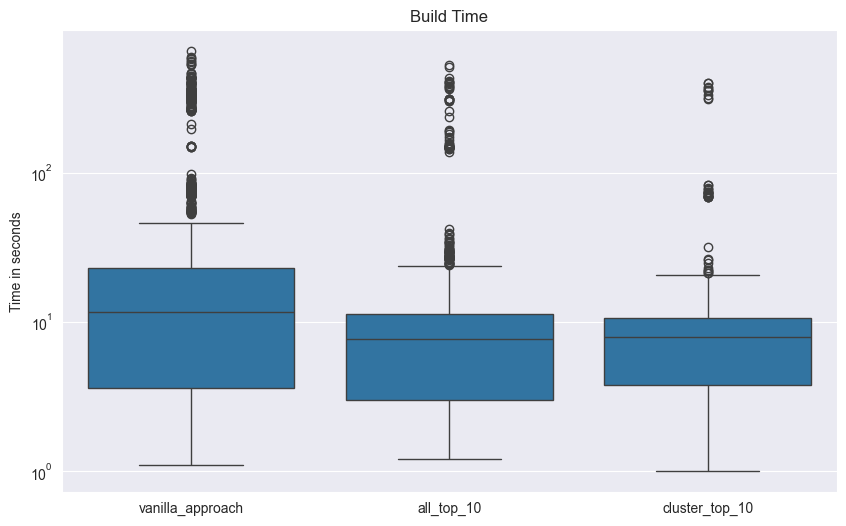

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='what', y='values', data=toplot)
plt.xlabel('')
plt.ylabel('Time in seconds')
plt.title('Build Time')
plt.yscale('log')
#plt.yticks([0.5, 1, 3, 5],[0.5, 1, 3, 5])
plt.show()

In [100]:
toplot = pd.DataFrame({'values': pd.concat([vanilla_approach.installtime, all_top_10.installtime, cluster_top_10.installtime], ignore_index=True), 'what': ['vanilla_approach'] * len(vanilla_approach) + ['all_top_10'] * len(all_top_10) + ['cluster_top_10'] * len(cluster_top_10)})
toplot = toplot[toplot['values']>-1]

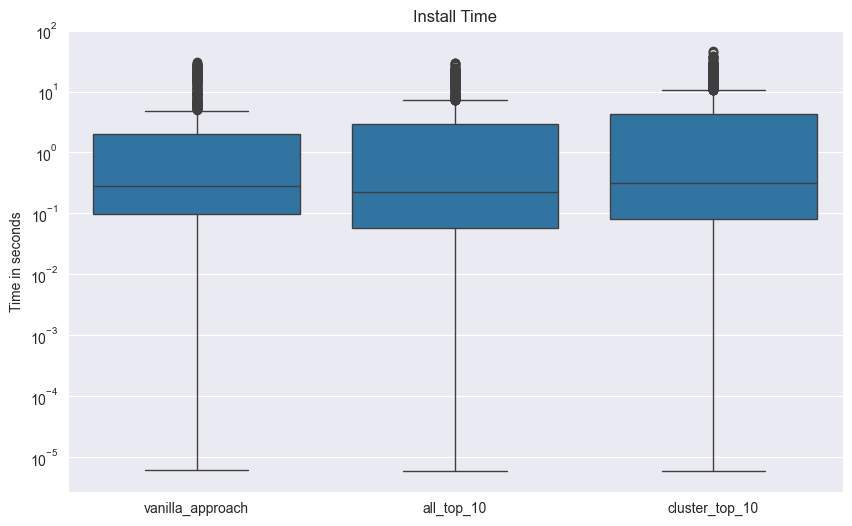

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='what', y='values', data=toplot)
plt.xlabel('')
plt.ylabel('Time in seconds')
plt.title('Install Time')
plt.yscale('log')
#plt.yticks([0.5, 1, 3, 5],[0.5, 1, 3, 5])
plt.show()

In [377]:
plot_build = pd.DataFrame({'values': pd.concat([vanilla_approach.buldingtime, all_top_10.buldingtime, cluster_top_10.buldingtime], ignore_index=True), 'what': ['Naïve'] * len(vanilla_approach) + ['All Top 10'] * len(all_top_10) + ['Cluster Top 10'] * len(cluster_top_10)})

plot_install = pd.DataFrame({'values': pd.concat([vanilla_approach.installtime, all_top_10.installtime, cluster_top_10.installtime], ignore_index=True), 'what': ['Naïve'] * len(vanilla_approach) + ['All Top 10'] * len(all_top_10) + ['Cluster Top 10'] * len(cluster_top_10)})
plot_install = plot_install[plot_install['values']>-1]


toplot = pd.DataFrame(pd.concat([plot_build, plot_install], ignore_index=True))
toplot['exp'] = ['Build Time'] * len(plot_build) + ['Install Time'] * len(plot_install) 

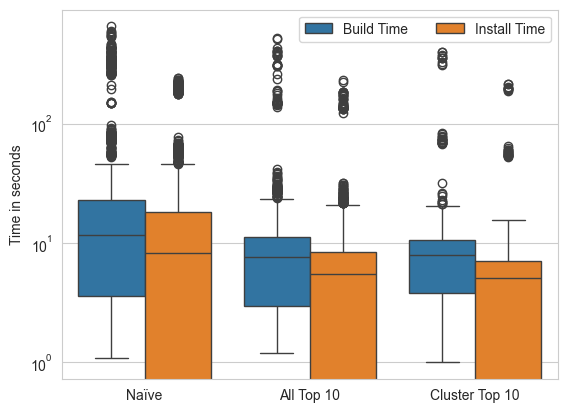

In [383]:
sns.set_style("whitegrid")
sns.boxplot(x='what', y='values', hue='exp', data=toplot)
plt.xlabel('')
plt.ylabel('Time in seconds')
plt.yscale('log')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), shadow=False, ncol=2)

plt.savefig('figures/buildtime.pdf', format='pdf')

# Show the plot
plt.show()

In [392]:
#toplot = pd.DataFrame({'values': pd.concat([vanilla_approach.starttime, all_top_10.starttime, cluster_top_10.starttime], ignore_index=True), 'what': ['vanilla_approach'] * len(vanilla_approach) + ['all_top_10'] * len(all_top_10) + ['cluster_top_10'] * len(cluster_top_10)})
toplot = pd.DataFrame({'values': pd.concat([vanilla_approach['starttime1'], vanilla_approach['starttime2'], vanilla_approach['starttime3'], vanilla_approach['starttime4'], vanilla_approach['starttime5'],
               all_top_10['starttime1'], all_top_10['starttime2'], all_top_10['starttime3'], all_top_10['starttime4'], all_top_10['starttime5'],
               cluster_top_10['starttime1'], cluster_top_10['starttime2'], cluster_top_10['starttime3'], cluster_top_10['starttime4'], cluster_top_10['starttime5']], ignore_index=True), 
            'what': ['Naïve'] * 5 * len(vanilla_approach) + ['All Top 10'] * 5 * len(all_top_10) + ['Cluster Top 10'] * 5 * len(cluster_top_10)})

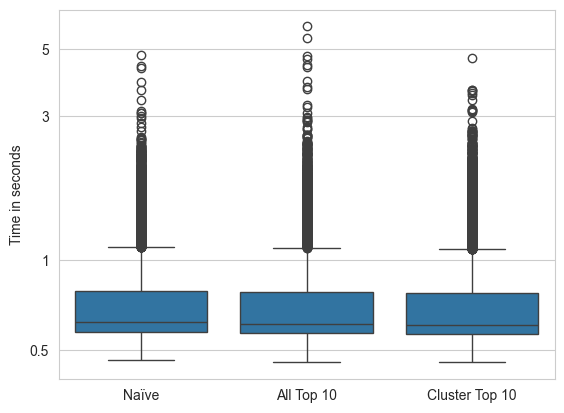

In [396]:
sns.set_style("whitegrid")
#plt.figure(figsize=(10, 6))
sns.boxplot(x='what', y='values', data=toplot)
plt.xlabel('')
plt.ylabel('Time in seconds')
plt.yscale('log')
plt.yticks([0.5, 1, 3, 5],[0.5, 1, 3, 5])

plt.savefig('figures/start.pdf', format='pdf')

plt.show()

In [102]:
toplot = pd.DataFrame({'values': pd.concat([vanilla_approach.importtime, all_top_10.importtime, cluster_top_10.importtime], ignore_index=True), 'what': ['vanilla_approach'] * len(vanilla_approach) + ['all_top_10'] * len(all_top_10) + ['cluster_top_10'] * len(cluster_top_10)})

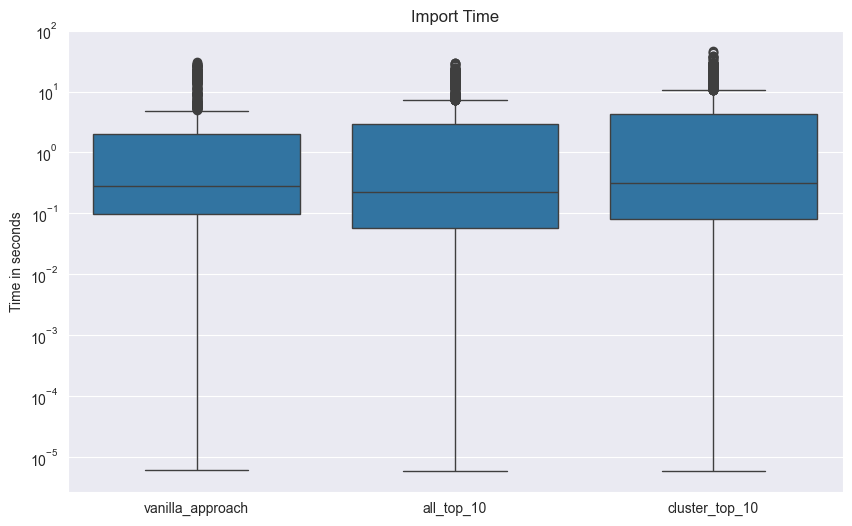

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='what', y='values', data=toplot)
plt.xlabel('')
plt.ylabel('Time in seconds')
plt.title('Import Time')
plt.yscale('log')
#plt.yticks([0.5, 1, 3, 5],[0.5, 1, 3, 5])
plt.show()

In [385]:
plot_start = pd.DataFrame({'values': pd.concat([vanilla_approach['starttime1'], vanilla_approach['starttime2'], vanilla_approach['starttime3'], vanilla_approach['starttime4'], vanilla_approach['starttime5'],
               all_top_10['starttime1'], all_top_10['starttime2'], all_top_10['starttime3'], all_top_10['starttime4'], all_top_10['starttime5'],
               cluster_top_10['starttime1'], cluster_top_10['starttime2'], cluster_top_10['starttime3'], cluster_top_10['starttime4'], cluster_top_10['starttime5']], ignore_index=True), 
            'what': ['Naïve'] * 5 * len(vanilla_approach) + ['All Top 10'] * 5 * len(all_top_10) + ['Cluster Top 10'] * 5 * len(cluster_top_10)})

plot_import = pd.DataFrame({'values': pd.concat([vanilla_approach.importtime, all_top_10.importtime, cluster_top_10.importtime], ignore_index=True), 'what': ['Naïve'] * len(vanilla_approach) + ['All Top 10'] * len(all_top_10) + ['Cluster Top 10'] * len(cluster_top_10)})



toplot = pd.DataFrame(pd.concat([plot_start, plot_import], ignore_index=True))
toplot['exp'] = ['Start Time'] * len(plot_start) + ['Import Time'] * len(plot_import) 

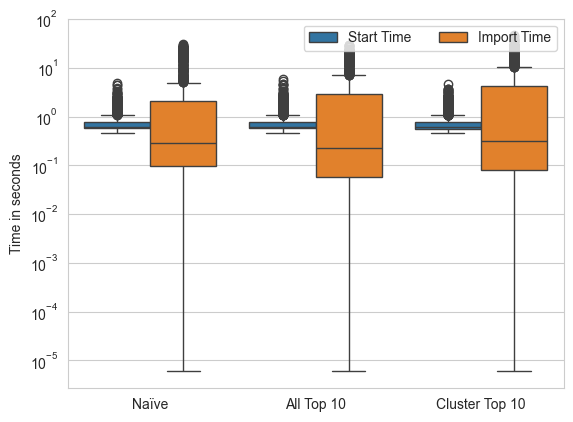

In [386]:
sns.set_style("whitegrid")
sns.boxplot(x='what', y='values', hue='exp', data=toplot)
plt.xlabel('')
plt.ylabel('Time in seconds')
plt.yscale('log')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), shadow=False, ncol=2)

plt.savefig('figures/start.pdf', format='pdf')

# Show the plot
plt.show()

In [284]:
install = pd.read_csv("experiments/installations.csv")
install_libaries = pd.DataFrame()
for index, row in install.iterrows():
    if pd.isna(row[1]):
        ins = set()
    else: 
        ins = set(row[1].split(";"))
    all = set(row[2].split(";"))
    if pd.isna(row[3]):
        clu = set()
    else: 
        clu = set(row[3].split(";"))
    install_libaries = pd.concat([install_libaries, pd.DataFrame([[len(ins), len(ins.intersection(all)), len(ins.intersection(clu)), len(all), len(clu)]])], ignore_index=True)
install_libaries.columns = ['toInstall', 'AlreayInstalled_all', 'AlreayInstalled_cluster', 'Installed_all', 'Installed_cluster']

install_libaries.head()

/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_6215/1746028317.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(row[1]):
/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_6215/1746028317.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ins = set(row[1].split(";"))
/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_6215/1746028317.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all = 

,toInstall,AlreayInstalled_all,AlreayInstalled_cluster,Installed_all,Installed_cluster
0,7,3,7,10,10
1,6,2,6,10,10
2,1,0,1,10,10
3,1,0,1,10,11
4,1,0,1,10,11


In [288]:
install_libaries = install_libaries[install_libaries.toInstall>0]
print(install_libaries.toInstall.describe())
print((install_libaries.toInstall - install_libaries.AlreayInstalled_all).describe())
print((install_libaries.toInstall - install_libaries.AlreayInstalled_cluster).describe())

count    149.000000
mean       1.993289
std        1.402202
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: toInstall, dtype: float64
count    149.000000
mean       0.791946
std        0.960540
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        5.000000
dtype: float64
count    149.000000
mean       0.067114
std        0.300100
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
dtype: float64


In [289]:
tmp = (install_libaries.toInstall - install_libaries.AlreayInstalled_cluster)
len(tmp[tmp==0])/len(tmp)

0.9463087248322147

In [290]:
print((install_libaries.Installed_all - install_libaries.toInstall).describe())
tmp = install_libaries.Installed_cluster - install_libaries.toInstall
print(tmp[tmp>0].describe())

count    149.000000
mean       8.006711
std        1.402202
min        3.000000
25%        8.000000
50%        9.000000
75%        9.000000
max        9.000000
dtype: float64
count    132.000000
mean       6.931818
std        2.801835
min        1.000000
25%        5.000000
50%        8.000000
75%        9.000000
max       10.000000
dtype: float64


In [541]:
size_vanilla = pd.read_csv("data/vanilla_approach/size.csv", header=None)
size_cluster_top_10 = pd.read_csv("data/cluster_top_10/size.csv", header=None)
size_all_top_10 = pd.read_csv("data/all_top_10/size.csv", header=None)
size_onthefly = 1.01

In [542]:
size_vanilla[1] = [float(re.sub(r'GB$', '', size)) for size in size_vanilla[1]]
size_cluster_top_10[1] = [float(re.sub(r'GB$', '', size)) for size in size_cluster_top_10[1]]
size_all_top_10[1] = [float(re.sub(r'GB$', '', size)) for size in size_all_top_10[1]]

In [544]:
print(pd.DataFrame({'values' : size_vanilla[1].repeat(vanilla_approach_func['count'].iloc[0:207])}).describe())
print(pd.DataFrame({'values' : size_all_top_10[1].repeat(vanilla_approach_func['count'].iloc[0:207])}).describe())
print(pd.DataFrame({'values' : size_cluster_top_10[1].repeat(vanilla_approach_func['count'].iloc[0:207])}).describe())

            values
count  1187.000000
mean      1.733336
std       1.606800
min       1.010000
25%       1.010000
50%       1.020000
75%       1.250000
max       7.330000
            values
count  1187.000000
mean      8.465914
std       0.093987
min       8.450000
25%       8.450000
50%       8.450000
75%       8.450000
max       9.560000
            values
count  1187.000000
mean      3.335139
std       2.442924
min       1.010000
25%       1.250000
50%       1.580000
75%       6.370000
max       7.330000


/Users/antree/Documents/Research/package-preloading/venv/lib/python3.11/site-packages/pandas/core/series.py:1022: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)
/Users/antree/Documents/Research/package-preloading/venv/lib/python3.11/site-packages/pandas/core/series.py:1022: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)
/Users/antree/Documents/Research/package-preloading/venv/lib/python3.11/site-packages/pandas/core/series.py:1022: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


In [177]:
#func_mapping.head()

,Unnamed: 0.1,func4.name,imports,Cluster
0,0,0-04-_check_slurm_job_statuses.py,subprocess,Job
3,3,873-04-call_mtrack.py,mtrack;sys,Data:_mtrack
4,4,43-04-make_corr_plots.py,json;os;xpcs_webplot,Sci:_Instruments
6,6,3-04-submit_slurm_job.py,os;subprocess,Job
7,7,397-01-rejection_sample.py,random,Trivial


In [178]:
#task_mapping = pd.read_csv("funcx/task_function_mapping.csv")
#task_mapping.head()

,task_uuid,func4.name,executiontime
0,000001d5-b3f0-4c17-8074-04f013f7bf52,0-04-_check_slurm_job_statuses.py,0.0243
1,00002521-04ba-4fb6-9c38-92ba23dc00d7,0-04-_check_slurm_job_statuses.py,0.0331
2,00002642-f850-42b4-9e1e-2698c3396498,0-04-_check_slurm_job_statuses.py,0.0432
3,00002deb-cf79-43ed-8aff-3281938809fe,0-04-_check_slurm_job_statuses.py,0.0268
4,0000754b-898e-43dc-9b55-35d1a6fe6633,0-04-_check_slurm_job_statuses.py,0.0284


In [182]:
#funcs = pd.merge(func_mapping, task_mapping, on="func4.name")
#funcs.shape

(1339976, 6)

In [183]:
#counts = funcs.imports.value_counts()
#counts = pd.DataFrame(counts)
#counts.reset_index(inplace=True)
#counts = counts._append({'imports': "argparse;copy;datetime;funcx;itertools;json;matplotlib;numpy;os;pathlib;shutil;sys;threading;typing", 'count': 1}, ignore_index=True)
#counts.tail()

,imports,count
242,numpy;os;tensorflow,1
243,numpy;sklearn;torch,1
244,identify;os;settings,1
245,mtrack,1
246,argparse;copy;datetime;funcx;itertools;json;ma...,1


In [132]:
#install_libaries['imports'] = install.imports
#install_libaries.head()

,toInstall,AlreayInstalled_all,AlreayInstalled_cluster,imports
0,7,3,7,argparse;copy;datetime;funcx;itertools;json;ma...
1,6,2,6,argparse;copy;funcx;itertools;json;matplotlib;...
2,1,0,1,argparse;sys
3,1,0,1,CLEAN
4,1,0,1,CLEAN;os


In [184]:
#df = pd.merge(install_libaries[install_libaries.toInstall>0], counts, on="imports")
#df.head()

,toInstall,AlreayInstalled_all,AlreayInstalled_cluster,imports,count
0,7,3,7,argparse;copy;datetime;funcx;itertools;json;ma...,1
1,1,0,1,CLEAN,2
2,1,0,1,CLEAN;os,6
3,2,1,2,CLEAN;os;pandas,14
4,6,5,6,collections;dataset;imblearn;numpy;os;pandas;s...,2


In [192]:
#print(pd.DataFrame({'values' : df.toInstall.repeat(df['count'])}).describe())
#print(pd.DataFrame({'values' : (df.toInstall - df.AlreayInstalled_all).repeat(df['count'])}).describe())
#print(pd.DataFrame({'values' : (df.toInstall - df.AlreayInstalled_cluster).repeat(df['count'])}).describe())

              values
count  116181.000000
mean        1.945490
std         1.409403
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max         7.000000
              values
count  116181.000000
mean        0.575808
std         0.536863
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
              values
count  116181.000000
mean        0.000792
std         0.032660
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000


In [189]:
#install_libaries[install_libaries.toInstall>0].describe()

,toInstall,AlreayInstalled_all,AlreayInstalled_cluster
count,149.000000,149.000000,149.000000
mean,1.993289,1.201342,1.926174
std,1.402202,1.185383,1.428919
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000
max,7.000000,5.000000,7.000000


In [263]:
max_start = max(itertools.chain.from_iterable([vanilla_approach[f'starttime{i+1}'] for i in range(5)]))

plot_start = pd.DataFrame({'values': pd.concat([vanilla_approach['starttime1']/max_start, vanilla_approach['starttime2']/max_start, vanilla_approach['starttime3']/max_start, vanilla_approach['starttime4']/max_start, vanilla_approach['starttime5']/max_start, all_top_10['starttime1']/max_start, all_top_10['starttime2']/max_start, all_top_10['starttime3']/max_start, all_top_10['starttime4']/max_start, all_top_10['starttime5']/max_start,
               cluster_top_10['starttime1']/max_start, cluster_top_10['starttime2']/max_start, cluster_top_10['starttime3']/max_start, cluster_top_10['starttime4']/max_start, cluster_top_10['starttime5']/max_start], ignore_index=True), 
            'what': ['vanilla_approach'] * 5 * len(vanilla_approach) + ['all_top_10'] * 5 * len(all_top_10) + ['cluster_top_10'] * 5 * len(cluster_top_10)})

plot_build = pd.DataFrame({'values': pd.concat([vanilla_approach.buldingtime/max(vanilla_approach.buldingtime), all_top_10.buldingtime/max(vanilla_approach.buldingtime), cluster_top_10.buldingtime/max(vanilla_approach.buldingtime)], ignore_index=True), 'what': ['vanilla_approach'] * len(vanilla_approach) + ['all_top_10'] * len(all_top_10) + ['cluster_top_10'] * len(cluster_top_10)})

plot_install = pd.DataFrame({'values': pd.concat([vanilla_approach.installtime/max(vanilla_approach.installtime), all_top_10.installtime/max(vanilla_approach.installtime), cluster_top_10.installtime/max(vanilla_approach.installtime)], ignore_index=True), 'what': ['vanilla_approach'] * len(vanilla_approach) + ['all_top_10'] * len(all_top_10) + ['cluster_top_10'] * len(cluster_top_10)})
plot_install = plot_install[plot_install['values']>-1]

plot_import = pd.DataFrame({'values': pd.concat(
    [vanilla_approach.importtime/max(vanilla_approach.importtime), all_top_10.importtime/max(vanilla_approach.importtime), cluster_top_10.importtime/max(vanilla_approach.importtime)], ignore_index=True),
                       'what': ['vanilla_approach'] * len(vanilla_approach) + ['all_top_10'] * len(all_top_10) + [
                           'cluster_top_10'] * len(cluster_top_10)})

toplot = pd.DataFrame(pd.concat([plot_build, plot_install, plot_start, plot_import], ignore_index=True))
toplot['exp'] = ['Build'] * len(plot_build) + ['Install'] * len(plot_install) + ['Start'] * len(plot_start) + ['Import'] * len(plot_import)

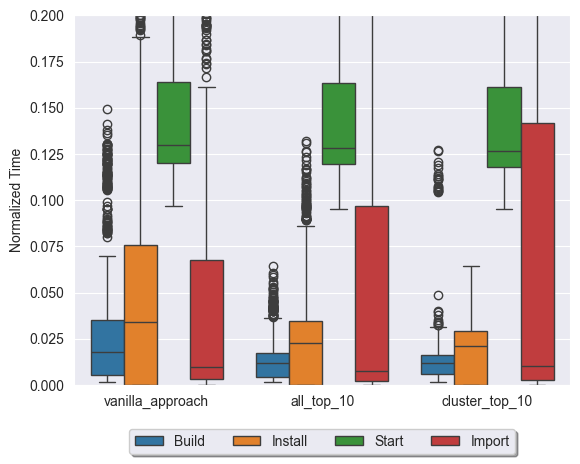

In [265]:
sns.boxplot(x='what', y='values', hue='exp', data=toplot)
plt.xlabel('')
plt.ylabel('Normalized Time')
#plt.yscale('log')
plt.ylim(0,0.2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=4)
# Show the plot
plt.show()